## Introduction
This notebook is for testing the readability of the result dataset. Run this after generating the data using the example script `mpi_test.py`

In [1]:
import zarr

dataset_path = './example_data/dataset.zarr'

# Open the dataset in read mode
root = zarr.open_group(dataset_path, mode='r')

# Access the arrays
X_flux = root["X_flux_coeffs"]
X_wts  = root["X_weights"]
Y_flux = root["Y_flux_coeffs"]
Y_pow  = root["Y_power_coeffs"]
Y_keff  = root["Y_keff"]
Y_wts = root["Y_weights"]

# Print dataset shapes
print("X_flux shape:", X_flux.shape)
print("X_weights shape:", X_wts.shape)
print("Y_flux shape:", Y_flux.shape)
print("Y_power shape:", Y_pow.shape)
print("Y_keff shape:", Y_keff.shape)

X_flux shape: (20, 4, 5, 5, 8, 1)
X_weights shape: (20, 4)
Y_flux shape: (20, 4, 5, 5, 8, 1)
Y_power shape: (20, 15)
Y_keff shape: (20,)


In [2]:
print(Y_keff[:])

[0.9552 0.9551 0.9525 0.9807 0.9998 1.304  1.3059 1.2995 1.3076 1.294
 1.3181 1.2949 1.2948 1.3115 1.2972 1.3126 1.2934 1.3109 1.3124 1.3167]


In [3]:
print(Y_wts[:])

[[0.26748466 0.29210123 0.17668712 0.26372699]
 [0.26411896 0.3003313  0.20286617 0.23268357]
 [0.26305609 0.30444874 0.19814313 0.23435203]
 [0.24305341 0.28974992 0.21812288 0.24907379]
 [0.2258614  0.30855594 0.23492063 0.23066202]
 [0.24915644 0.28796012 0.18197853 0.28090491]
 [0.26135232 0.26617658 0.2079026  0.2645685 ]
 [0.24771066 0.29295883 0.17860716 0.28072336]
 [0.26468339 0.26896604 0.2302692  0.23608137]
 [0.25146832 0.29211747 0.20401855 0.25239567]
 [0.2498293  0.28101055 0.20901297 0.26014718]
 [0.24534713 0.29523515 0.23569388 0.22372384]
 [0.25502008 0.28490887 0.23169601 0.22837504]
 [0.23743805 0.29958063 0.23309188 0.22988944]
 [0.22001233 0.29702436 0.2471477  0.2358156 ]
 [0.24249581 0.27822642 0.22291635 0.25636142]
 [0.24601825 0.26194526 0.22436988 0.26766662]
 [0.24220002 0.25791441 0.23785186 0.26203372]
 [0.2480189  0.25571472 0.24222798 0.2540384 ]
 [0.24227235 0.25761373 0.2333865  0.26672742]]


Plot an example incident/outgoing flux, pin power example

Text(0, 0.5, 'Flux')

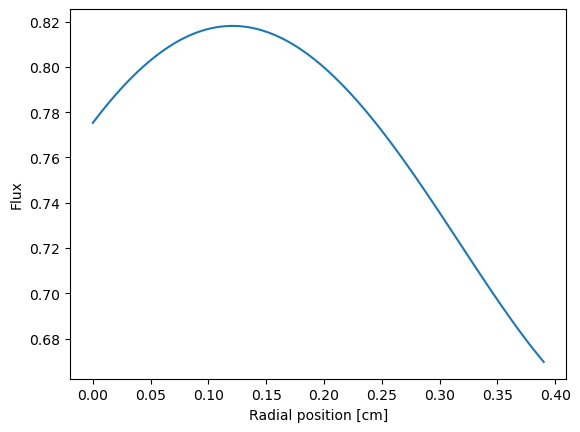

In [4]:
from pincell_moment_utils.datagen import DefaultPincellParameters
import openmc
import matplotlib.pyplot as plt
import numpy as np

sample = 11
params = DefaultPincellParameters()
radius = params.fuel_or

# First plot radial pincell flux profile
zz = openmc.Zernike(Y_pow[sample], radius)
rr = np.linspace(0, radius, 100)
plt.plot(rr, zz(rr, 0.0)) 
plt.xlabel('Radial position [cm]')
plt.ylabel('Flux')

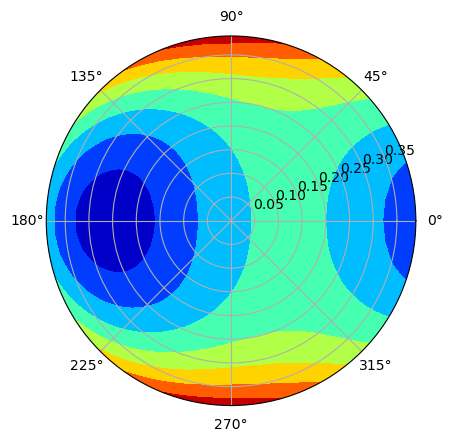

In [5]:
# Now do a polar plot
zz = openmc.Zernike(Y_pow[sample], radius=radius) 
#
# Using linspace so that the endpoint of 360 is included...
azimuths = np.radians(np.linspace(0, 360, 50))
zeniths = np.linspace(0, radius, 100)
r, theta = np.meshgrid(zeniths, azimuths)
values = zz(zeniths, azimuths)
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, r, values, cmap='jet')
plt.show()

These profiles admittedly look very strange, but perhaps this is to be expected from randomly generated surface expansion profiles

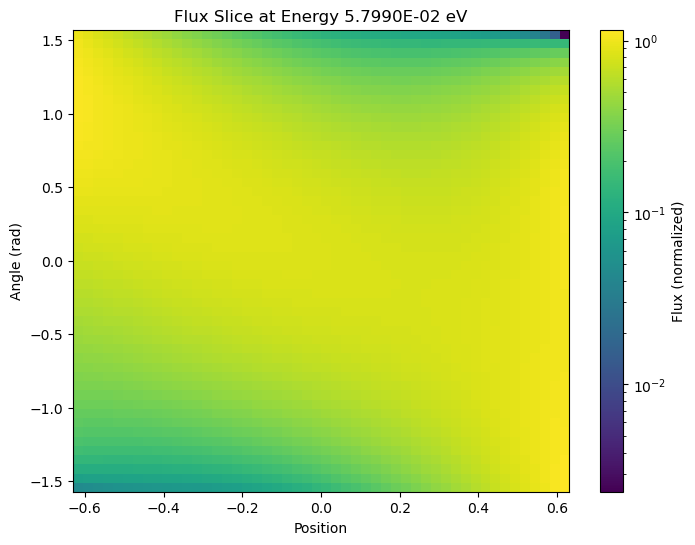

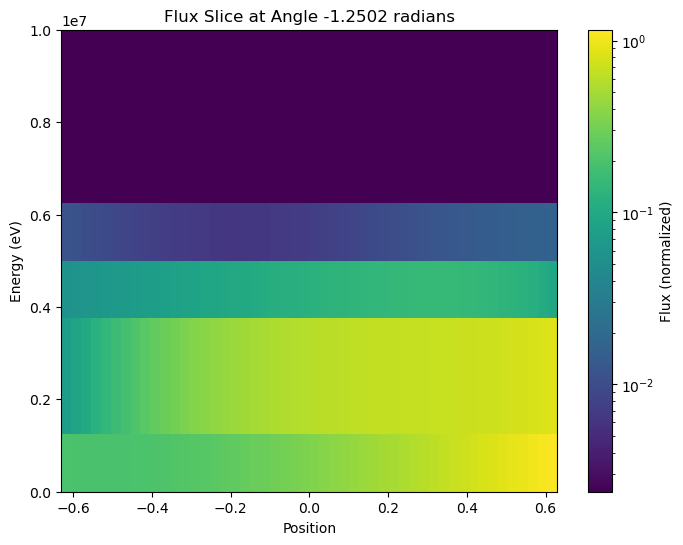

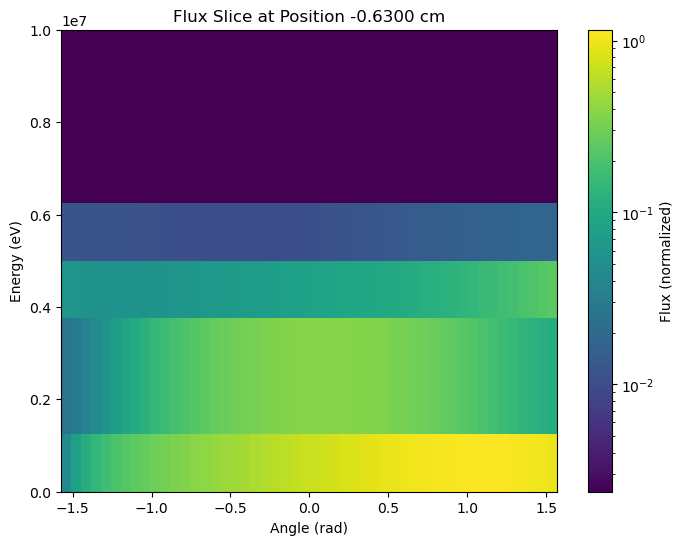

In [6]:
import pincell_moment_utils.postprocessing as pp
from pincell_moment_utils.plotting import plot_expansion

incident_flux = pp.surface_expansion(X_flux[sample], params.energy_filters, incident=True)
outgoing_flux = pp.surface_expansion(Y_flux[sample], params.energy_filters, incident=False)


plot_expansion(incident_flux, 0, 5, 0, 1, 50, 50, incident=True)

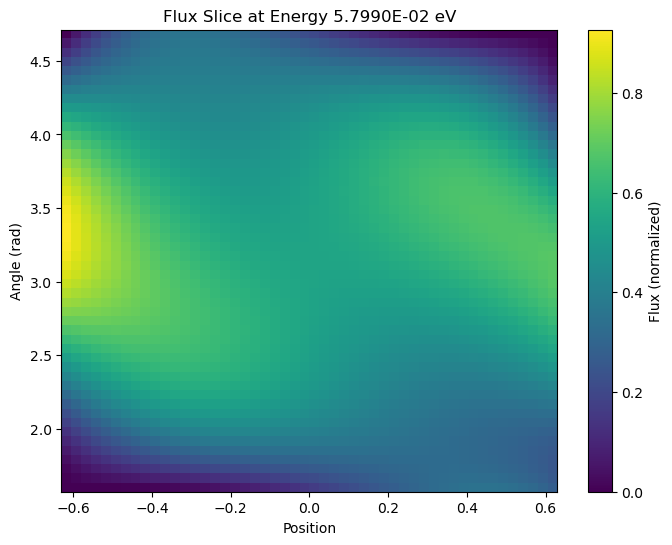

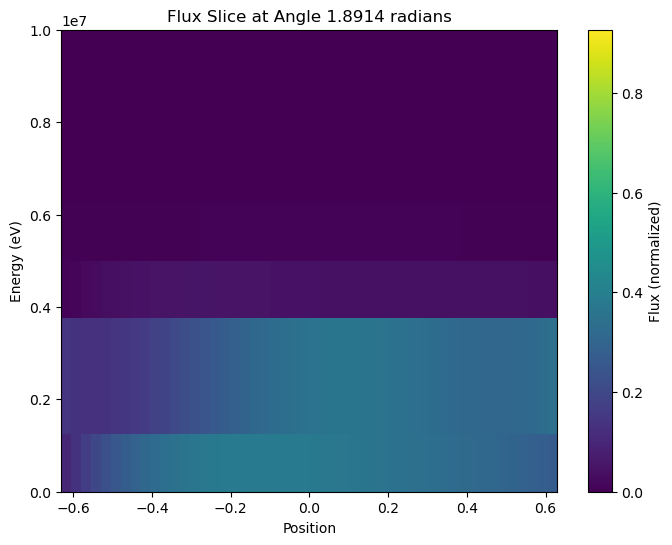

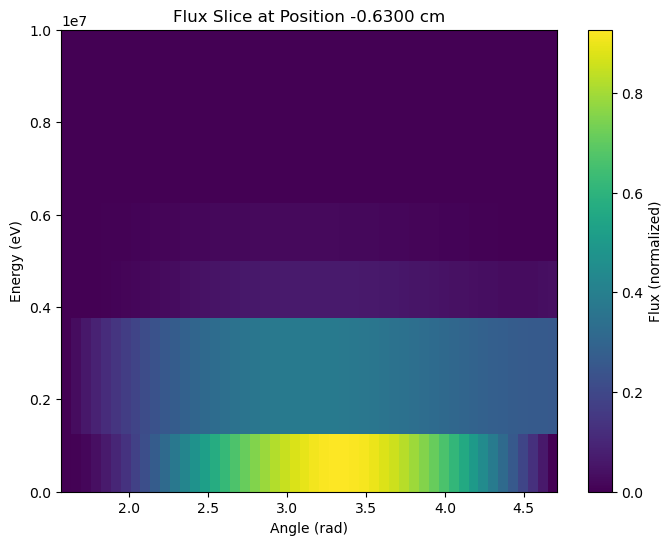

In [7]:
plot_expansion(outgoing_flux, 0, 5, 0, 1, 50, 50, incident=False)

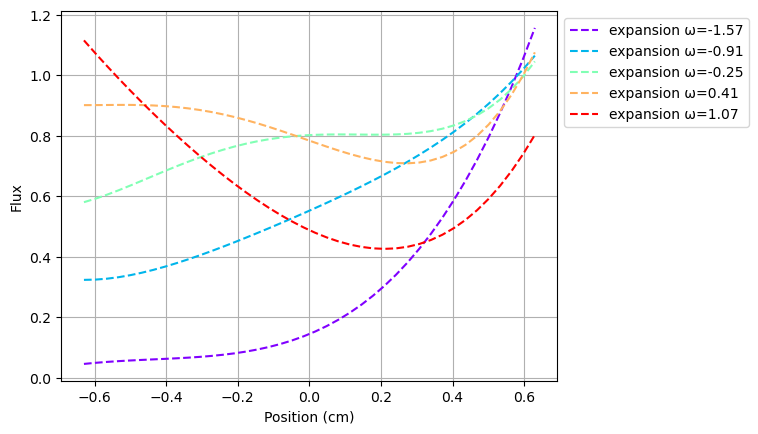

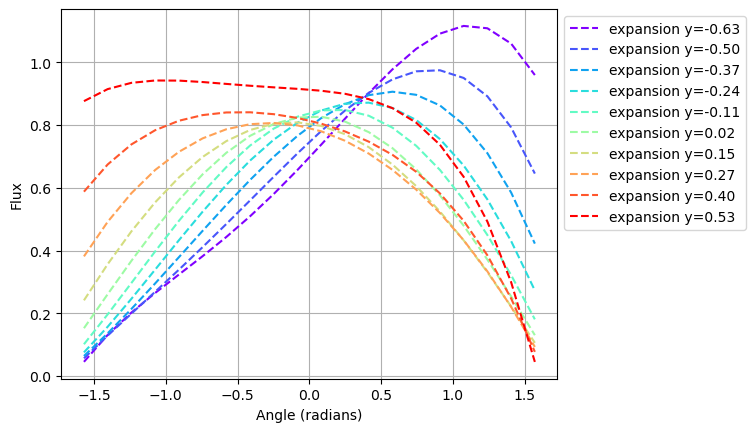

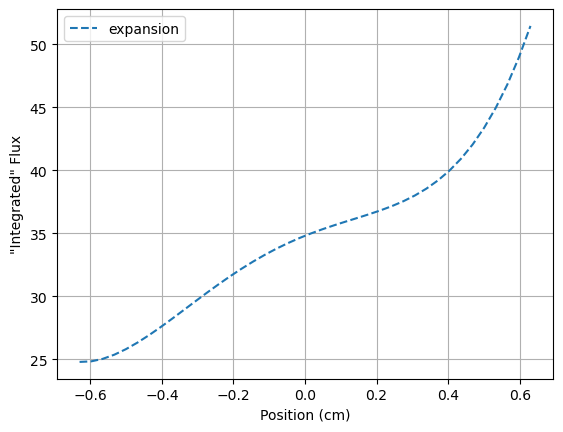

In [8]:
from pincell_moment_utils.plotting import plot_expansion_slice

plot_expansion_slice(incident_flux, 0, 1, incident=True)

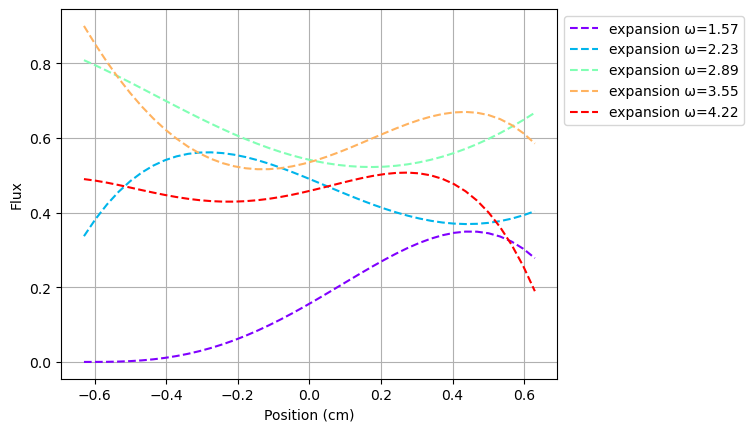

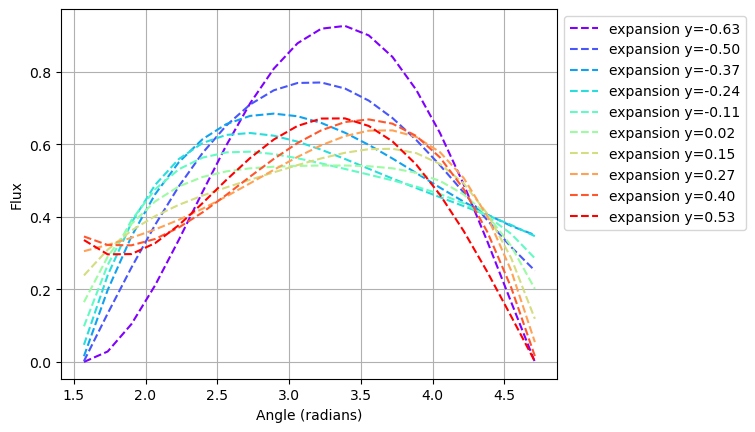

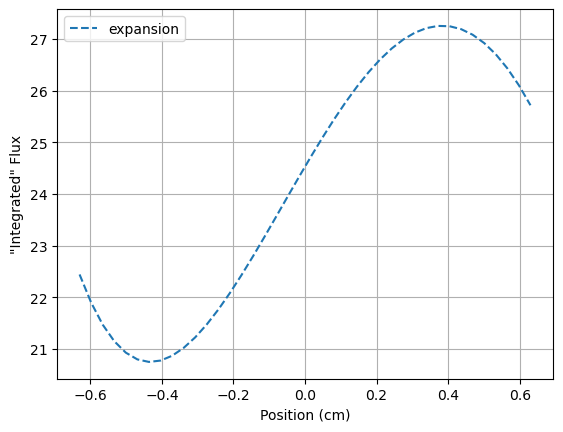

In [9]:
plot_expansion_slice(outgoing_flux, 0, 1, incident=False)